In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.genfromtxt(r'D:\University\MyProject\Source\data_result_training\training_resultx8pre.csv', delimiter=',', dtype=float)
train_loss = data[0].tolist()
train_mIou = data[1].tolist()
train_mAcc = data[2].tolist()
train_allAcc = data[3].tolist()
val_loss = data[4].tolist()
val_mIou = data[5].tolist()
val_mAcc = data[6].tolist()
val_allAcc = data[7].tolist()

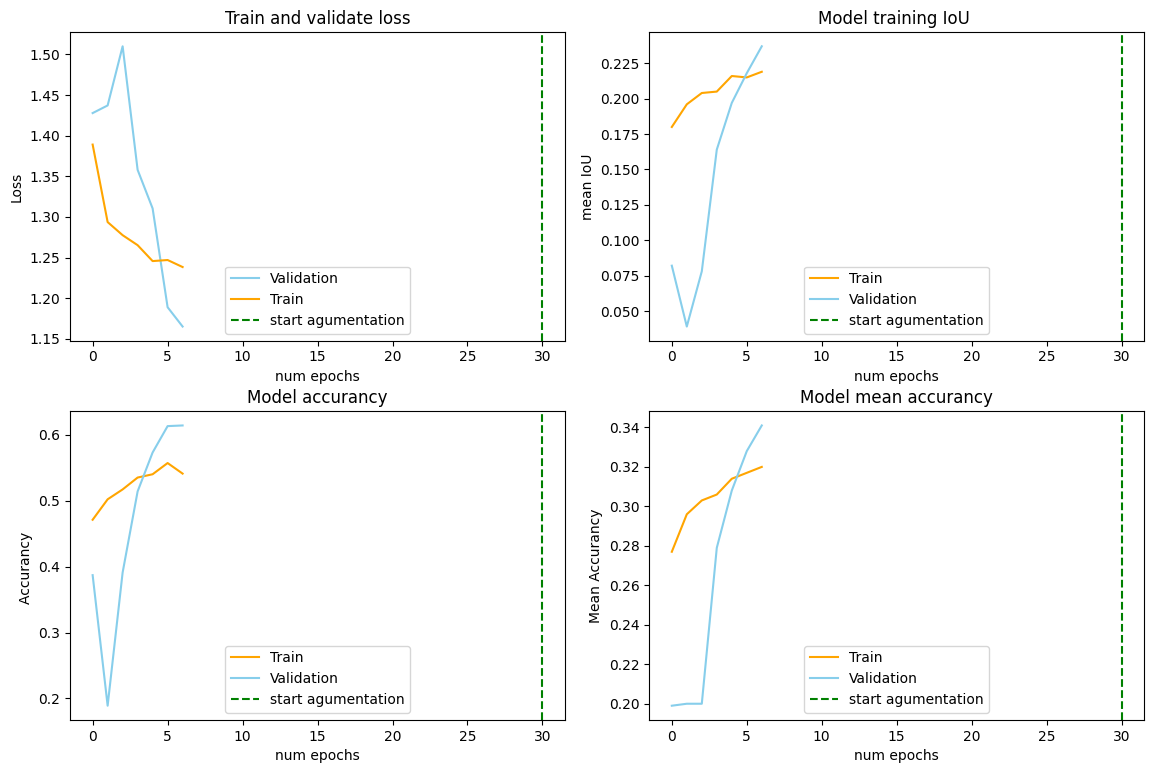

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
fig.tight_layout(pad=3)
#create subplots
ax[0, 0].plot(val_loss, color='skyblue', label='Validation')
ax[0, 0].plot(train_loss, color='orange', label='Train')
ax[0, 0].axvline(x=30, color='green', linestyle='--', label='start agumentation')
ax[0, 0].legend()
ax[0, 0].set_title('Train and validate loss')
ax[0, 0].xaxis.set_label_text('num epochs')
ax[0, 0].yaxis.set_label_text('Loss')


ax[0, 1].plot(train_mIou, color='orange', label='Train')
ax[0, 1].plot(val_mIou, color='skyblue', label='Validation')
ax[0, 1].axvline(x=30, color='green', linestyle='--', label='start agumentation')
ax[0, 1].legend()
ax[0, 1].set_title('Model training IoU ')
ax[0, 1].xaxis.set_label_text('num epochs')
ax[0, 1].yaxis.set_label_text('mean IoU')

ax[1, 1].plot(train_mAcc, color='orange', label='Train')
ax[1, 1].plot(val_mAcc, color='skyblue', label='Validation')
ax[1, 1].axvline(x=30, color='green', linestyle='--', label='start agumentation')
ax[1, 1].legend()
ax[1, 1].set_title('Model mean accurancy')
ax[1, 1].xaxis.set_label_text('num epochs')
ax[1, 1].yaxis.set_label_text('Mean Accurancy')

ax[1, 0].plot(train_allAcc, color='orange', label='Train')
ax[1, 0].plot(val_allAcc, color='skyblue', label='Validation')
ax[1, 0].axvline(x=30, color='green', linestyle='--', label='start agumentation')
ax[1, 0].legend()
ax[1, 0].set_title('Model accurancy')
ax[1, 0].xaxis.set_label_text('num epochs')
ax[1, 0].yaxis.set_label_text('Accurancy ')
plt.show()

In [33]:
import torch
from sklearn.metrics import f1_score, cohen_kappa_score

In [34]:
predictions = torch.randint(0, 5, (2, 256, 256))
target = torch.randint(0, 3, (2, 256, 256))

In [35]:
predictions = predictions.view(-1)  # This gives you [4 * 256 * 256] tensor.
target = target.view(-1)  # This also gives you [4 * 256 * 256] tensor.

In [39]:
print(target)

tensor([0, 1, 2,  ..., 2, 1, 1])


In [40]:
print(predictions)

tensor([1, 4, 3,  ..., 4, 0, 3])


In [36]:
f1_micro = f1_score(target, predictions, average='micro')
f1_macro = f1_score(target, predictions, average='macro')

In [37]:
kappa = cohen_kappa_score(target, predictions)
print(f"{kappa:.8f}")

0.00157326


In [38]:
score= kappa + (f1_micro + f1_macro)/2
print(f'{score:.8f}')

0.17723335
